In [149]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import sklearn.datasets as dta
from sklearn import datasets

In [150]:
#Read in Data, Merge the DF, and Preview.dup
mouse_metadata_path = "Pymaceuticals\\data\\Mouse_metadata.csv"
study_results_path = "Pymaceuticals\\data\\Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

study_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")
study_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [151]:
#Check if any NaN
study_df.count()

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
dtype: int64

In [152]:
#Check how many mice we have
len(pd.unique(study_df['Mouse ID']))

249

In [153]:
#Find the duplicates
duplicate_entries = study_df[study_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_entries

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [154]:
#Drop duplicates
complete_study = study_df.drop_duplicates(['Mouse ID', 'Timepoint'], keep='first')

In [155]:
#Make sure no more duplicates
duplicate_entries = complete_study[complete_study.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_entries

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


In [156]:
#Check how many entries we now have
complete_study.count()

Mouse ID              1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
dtype: int64

In [157]:
#Create summary statistics table
complete_study.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,19.597458,50.449276,1.023835,12.792903,25.661547
std,14.084762,8.904565,1.138507,7.186737,3.926776
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,5.000000,45.000000,0.000000,7.000000,25.000000
50%,20.000000,48.951421,1.000000,13.000000,27.000000
75%,30.000000,56.324075,2.000000,20.000000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


In [158]:
#Create Grouping by Drug Regimen and Summary Table
drug_grouping = complete_study.groupby(['Drug Regimen'])
Tumor_Volume_by_Drug = drug_grouping['Tumor Volume (mm3)']

In [159]:
#Calculate the fields
mean = Tumor_Volume_by_Drug.mean()
stnd = Tumor_Volume_by_Drug.std()
sems = Tumor_Volume_by_Drug.sem()
median = Tumor_Volume_by_Drug.median()
var = Tumor_Volume_by_Drug.var()

#Rename Series
Tumor_Mean = mean.rename("Mean")
Tumor_Median = median.rename("Median")
Tumor_STD = stnd.rename("STD")
Tumor_Var = var.rename("Variance")
Tumor_SEM = sems.rename("SEM")

summary_stats = {'Mean': Tumor_Mean, 'Median': Tumor_Median, 'STD': Tumor_STD, 'Variance': Tumor_Var, 'SEM': Tumor_SEM}
Drug_Regimen_Summary = pd.DataFrame(summary_stats)
Drug_Regimen_Summary

,Mean,Median,STD,Variance,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.393463,50.909965,6.568014,43.138803,0.525862
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


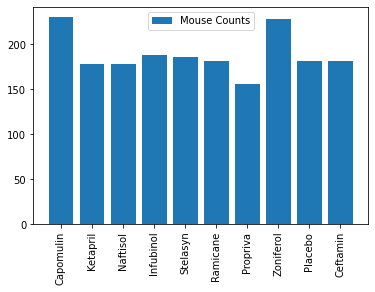

In [160]:
#PyPlot bar chart
mice_counts = drug_grouping['Mouse ID'].count()
x_axis = pd.unique(study_df['Drug Regimen'])
plt.xlabel = "Drug Regimen"
plt.ylabel = "Mouse Counts"
plt.bar(x_axis, mice_counts)
plt.legend(labels=['Mouse Counts'], loc="best")
plt.xticks(rotation=90)

plt.show()

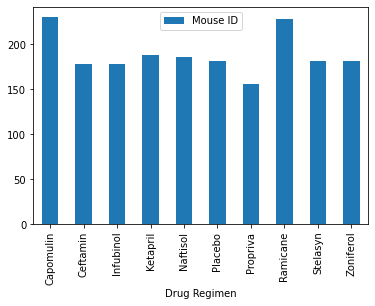

In [161]:
#DataFrame plot
Drug_Counts = pd.DataFrame(drug_grouping['Mouse ID'].count())
Drug_Counts.plot(kind="bar")

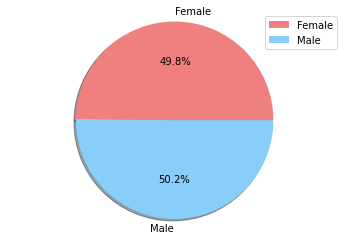

In [162]:
#Gender Grouping
gender_grouping = mouse_metadata.groupby(['Sex'])
Gender_Counts = gender_grouping['Sex'].count()

#PyPlot Pie
values = Gender_Counts
labels = pd.unique(Gender_Counts.index)
plt.pie(values, labels=labels, colors=["lightcoral", "lightskyblue"], autopct="%1.1f%%", shadow=True)
plt.axis("equal")
plt.legend(labels)
plt.show()

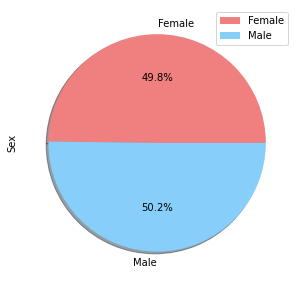

In [163]:
#DataFrame Pie
Gender_DF = pd.DataFrame(gender_grouping['Sex'].count())
#Gender_DF.plot(kind="pie")
plot = Gender_DF.plot.pie(y='Sex', colors=["lightcoral", "lightskyblue"], figsize=(5,5), shadow = True, autopct='%1.1f%%')

In [164]:
#Get final Timepoint for each mouse
mouse_group = complete_study.groupby(['Mouse ID'])
mouse_group['Timepoint'].max()

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

In [165]:
#Merge the final Timepoint for each mouse back into complete table
#Then, drop the NaN values for data points not at that mouse's final timepoint
final_timepoint_merge = pd.merge(complete_study, mouse_group.max(), on=["Mouse ID", 'Timepoint'], how="left")
final_timepoint = final_timepoint_merge.dropna()
final_timepoint

,Mouse ID,Timepoint,Tumor Volume (mm3)_x,Metastatic Sites_x,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Tumor Volume (mm3)_y,Metastatic Sites_y,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y
1,f932,0,45.000000,0,Ketapril,Male,15,29,45.000000,0.0,Ketapril,Male,15.0,29.0
20,x336,0,45.000000,0,Naftisol,Female,4,29,45.000000,0.0,Naftisol,Female,4.0,29.0
53,h428,0,45.000000,0,Ketapril,Female,1,27,45.000000,0.0,Ketapril,Female,1.0,27.0
55,v199,0,45.000000,0,Naftisol,Female,17,29,45.000000,0.0,Naftisol,Female,17.0,29.0
109,o848,0,45.000000,0,Stelasyn,Female,14,27,45.000000,0.0,Stelasyn,Female,14.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,r944,45,41.581521,2,Capomulin,Male,12,25,47.373423,2.0,Capomulin,Male,12.0,25.0
1884,u364,45,31.023923,3,Capomulin,Male,18,17,47.212200,3.0,Capomulin,Male,18.0,17.0
1885,p438,45,61.433892,1,Ceftamin,Female,11,26,61.433892,1.0,Ceftamin,Female,11.0,26.0
1886,x773,45,58.634971,4,Placebo,Female,21,30,58.634971,4.0,Placebo,Female,21.0,30.0


In [166]:
#Get the final volumes for each of the promising regimens

promising_studies = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_timepoint = final_timepoint[final_timepoint['Drug Regimen_y'].isin(promising_studies)]

final_timepoint2 = final_timepoint[['Mouse ID', 'Tumor Volume (mm3)_y', 'Drug Regimen_y']].copy()
final_timepoint3 = final_timepoint2.rename(columns={'Tumor Volume (mm3)_y': "Tumor_Volume", 'Drug Regimen_y': "Drug_Regimen"})
final_timepoint_promising = final_timepoint3.reset_index()
final_timepoint_promising

,index,Mouse ID,Tumor_Volume,Drug_Regimen
0,181,u153,45.000000,Ceftamin
1,193,b447,45.000000,Ceftamin
2,216,x226,45.000000,Ceftamin
3,221,t573,45.000000,Ceftamin
4,418,c326,45.000000,Infubinol
...,...,...,...,...
95,1874,a644,46.910892,Ramicane
96,1880,i177,45.000000,Ramicane
97,1883,r944,47.373423,Capomulin
98,1884,u364,47.212200,Capomulin


In [167]:
#Create Promising_Results dataframe

all_tumor_volumes = []

for drug in promising_studies:
    list = []
    for index, row in final_timepoint_promising.iterrows():
        if row['Drug_Regimen'] == drug:
            list.append(row['Tumor_Volume'])
        else:
            next
    all_tumor_volumes.append(list)
    next


dictionary = dict(zip(promising_studies, all_tumor_volumes))
Promising_results_df = pd.DataFrame.from_dict(dictionary)
Promising_results_df

,Capomulin,Ramicane,Infubinol,Ceftamin
0,45.000000,45.000000,45.000000,45.000000
1,46.539206,46.378092,46.250112,45.000000
2,45.000000,45.568211,47.010364,45.000000
3,46.408361,45.722279,45.699331,45.000000
4,45.651331,46.585433,51.542431,47.784682
5,46.749006,45.521875,54.048608,46.784535
6,48.070452,45.466677,50.005138,48.722078
7,46.304003,45.766111,55.650681,52.925348
8,45.781746,45.000000,60.969711,56.057749
9,46.809225,45.000000,54.656549,55.742829


In [168]:
#Calculate the quartile and IQR for each of the promising regimens
Capomulin_quartiles = Promising_results_df['Capomulin'].quantile([.25,.5,.75])
Capomulin_lowerq = Capomulin_quartiles[0.25]
Capomulin_upperq = Capomulin_quartiles[0.75]
Capomulin_iqr = Capomulin_upperq-Capomulin_lowerq

Capomulin_iqr_lower_bound = Capomulin_lowerq - (1.5*Capomulin_iqr)
Capomulin_iqr_upper_bound = Capomulin_upperq + (1.5*Capomulin_iqr)

Ramicane_quartiles = Promising_results_df['Ramicane'].quantile([.25,.5,.75])
Ramicane_lowerq = Ramicane_quartiles[0.25]
Ramicane_upperq = Ramicane_quartiles[0.75]
Ramicane_iqr = Ramicane_upperq-Ramicane_lowerq

Ramicane_iqr_lower_bound = Ramicane_lowerq - (1.5*Ramicane_iqr)
Ramicane_iqr_upper_bound = Ramicane_upperq + (1.5*Ramicane_iqr)

Infubinol_quartiles = Promising_results_df['Infubinol'].quantile([.25,.5,.75])
Infubinol_lowerq = Infubinol_quartiles[0.25]
Infubinol_upperq = Infubinol_quartiles[0.75]
Infubinol_iqr = Infubinol_upperq-Infubinol_lowerq

Infubinol_iqr_lower_bound = Infubinol_lowerq - (1.5*Infubinol_iqr)
Infubinol_iqr_upper_bound = Infubinol_upperq + (1.5*Infubinol_iqr)

Ceftamin_quartiles = Promising_results_df['Ceftamin'].quantile([.25,.5,.75])
Ceftamin_lowerq = Ceftamin_quartiles[0.25]
Ceftamin_upperq = Ceftamin_quartiles[0.75]
Ceftamin_iqr = Ceftamin_upperq-Infubinol_lowerq

Ceftamin_iqr_lower_bound = Ceftamin_lowerq - (1.5*Ceftamin_iqr)
Ceftamin_iqr_upper_bound = Ceftamin_upperq + (1.5*Ceftamin_iqr)

print(f"The lower quartile of Capomulin is: {Capomulin_lowerq}")
print(f"The upper quartile of Capomulin is: {Capomulin_upperq}")
print(f"The interquartile range of Capomulin is: {Capomulin_iqr}")

print(f"The lower quartile of Ramicane is: {Ramicane_lowerq}")
print(f"The upper quartile of Ramicane is: {Ramicane_upperq}")
print(f"The interquartile range of Ramicane is: {Ramicane_iqr}")

print(f"The lower quartile of Infubinol is: {Infubinol_lowerq}")
print(f"The upper quartile of Infubinol is: {Infubinol_upperq}")
print(f"The interquartile range of Infubinol is: {Infubinol_iqr}")

print(f"The lower quartile of Ceftamin is: {Ceftamin_lowerq}")
print(f"The upper quartile of Ceftamin is: {Ceftamin_upperq}")
print(f"The interquartile range of Ceftamin is: {Ceftamin_iqr}")

The lower quartile of Capomulin is: 45.0
The upper quartile of Capomulin is: 46.74900552
The interquartile range of Capomulin is: 1.7490055199999972
The lower quartile of Ramicane is: 45.0
The upper quartile of Ramicane is: 46.34383237
The interquartile range of Ramicane is: 1.3438323700000012
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquartile range of Ceftamin is: 10.251222339999998


In [169]:
#Determine any outliers 
#Could not figure out how to do a successful list comprehension where I could string together the column name to the lower and upper bound variables and successfully call it



for index, row in Promising_results_df.iterrows():
    list = []
    if row['Capomulin'] <= Capomulin_iqr_lower_bound or row['Capomulin'] >= Capomulin_iqr_upper_bound:
        list.append(row[column])
    else:
        next
outliers = len(list)
print(f"Capomulin has {outliers} outliers.")

for index, row in Promising_results_df.iterrows():
    list = []
    if row['Ramicane'] <= Ramicane_iqr_lower_bound or row['Ramicane'] >= Ramicane_iqr_upper_bound:
        list.append(row[column])
    else:
        next
outliers = len(list)
print(f"Ramicane has {outliers} outliers.")

for index, row in Promising_results_df.iterrows():
    list = []
    if row['Infubinol'] <= Infubinol_iqr_lower_bound or row['Infubinol'] >= Infubinol_iqr_upper_bound:
        list.append(row[column])
    else:
        next
outliers = len(list)
print(f"Infubinol has {outliers} outliers.")

for index, row in Promising_results_df.iterrows():
    list = []
    if row['Ceftamin'] <= Ceftamin_iqr_lower_bound or row['Ceftamin'] >= Ceftamin_iqr_upper_bound:
        list.append(row[column])
    else:
        next
outliers = len(list)
print(f"Ceftamin has {outliers} outliers.")

Capomulin has 0 outliers.
Ramicane has 0 outliers.
Infubinol has 0 outliers.
Ceftamin has 0 outliers.


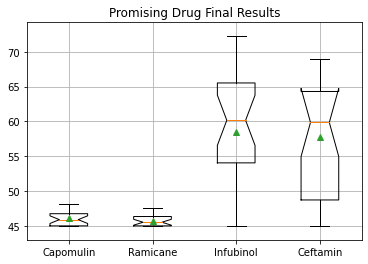

In [170]:
#Create box plot

data = [Promising_results_df['Capomulin'], Promising_results_df['Ramicane'], Promising_results_df['Infubinol'], Promising_results_df['Ceftamin']]
plt.boxplot(data, notch=True, showmeans=True, labels=promising_studies, showfliers=True)
plt.labels = promising_studies
plt.grid()
plt.ylim(final_timepoint_promising['Tumor_Volume'].min() - 2, final_timepoint_promising['Tumor_Volume'].max() + 2)
plt.title('Promising Drug Final Results')

plt.show()

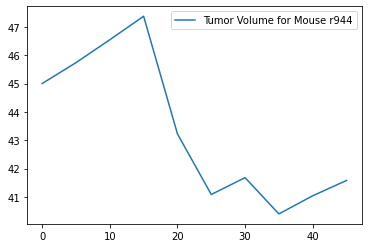

In [171]:
#Line Chart for Mouse

mouse_r944 = complete_study.loc[complete_study['Mouse ID'] == 'r944']

x_value = mouse_r944['Timepoint']
y_value = mouse_r944['Tumor Volume (mm3)']

plt.plot(x_value, y_value)
plt.xlabel = "Timepoint"
plt.ylabel = "Tumor Volume"
plt.legend(labels=['Tumor Volume for Mouse r944'], loc="best")
plt.show()

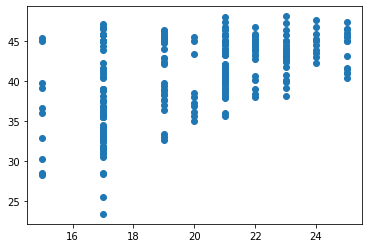

In [172]:
#Scatter plot for Capomulin

Capomulin_df = complete_study.loc[complete_study['Drug Regimen'] == 'Capomulin']
x_values = Capomulin_df['Weight (g)']
y_values = Capomulin_df['Tumor Volume (mm3)']
plt.scatter(x_values,y_values)
plt.xlabel = 'Weight'
plt.ylabel = 'Tumor Volume'
plt.show()

In [173]:
#Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(Capomulin_df['Weight (g)'], Capomulin_df['Tumor Volume (mm3)'])
regress_values = Capomulin_df['Weight (g)'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

'y = 0.96x + 21.49'